In [30]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('loan_data_json.json') as json_file:
    data = json.load(json_file)

In [3]:
#Transform to dataframe
loandata = pd.DataFrame(data)

In [4]:
#Finding unique value for the purpose column
loandata['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [5]:
#describe the data
loandata.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
#describe the data for a specific column
loandata['int.rate'].describe()
loandata['fico'].describe()

count    9578.000000
mean      710.846314
std        37.970537
min       612.000000
25%       682.000000
50%       707.000000
75%       737.000000
max       827.000000
Name: fico, dtype: float64

In [7]:
#debt to income ratio
loandata['dti'].describe()

count    9578.000000
mean       12.606679
std         6.883970
min         0.000000
25%         7.212500
50%        12.665000
75%        17.950000
max        29.960000
Name: dti, dtype: float64

In [10]:
#View the dataframe
display(loandata)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [19]:
#Using EXP() to get the annual income
income = np.exp(loandata['log.annual.inc'])
loandata['annualincome'] = round(income)

In [25]:
# Fico Score to category
ficocat = []
for x in range(0, len(loandata)):
    fico = loandata['fico'][x]
    if fico >= 300 and fico < 400:
        cat = 'Very Poor'
    elif fico >= 400 and fico < 600:
        cat = 'Poor'
    elif fico >= 601 and fico < 660:
        cat = 'Fair'
    elif fico >= 660 and fico < 700:
        cat = 'Good'
    elif fico >= 700:
        cat = 'Excellent'
    else:
        cat = 'Unknown'
    ficocat.append(cat)
ficocat = pd.Series(ficocat)
loandata['fico.category'] = ficocat

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,annualincome,fico.category
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,85000.0,Excellent
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,65000.0,Excellent
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,32000.0,Good
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,85000.0,Excellent
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,80800.0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,195000.0,Good
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,69000.0,Excellent
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,40000.0,Good
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,50000.0,Good


In [29]:
#df.loc as conditional statements
# df.loc[df[colname] condition, newcolname] = 'value if the condiditon is met'
# New col for interest rate. If rate > 0.12 then high, else low
loandata.loc[loandata['int.rate'] > 0.12, 'int.rate.type'] = 'High'
loandata.loc[loandata['int.rate'] < 0.12, 'int.rate.type'] = 'Low'
display(loandata)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,annualincome,fico.category,int.rate.type
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,85000.0,Excellent,Low
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,65000.0,Excellent,Low
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,32000.0,Good,High
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,85000.0,Excellent,Low
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,80800.0,Good,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,195000.0,Good,High
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,69000.0,Excellent,High
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,40000.0,Good,Low
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,50000.0,Good,High


<function matplotlib.pyplot.show(close=None, block=None)>

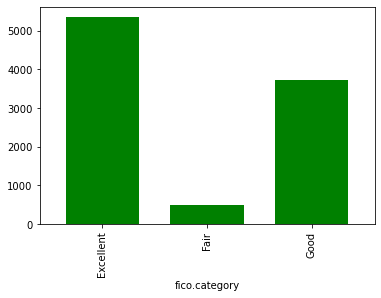

In [35]:
# Number of loans by fico.category (size() for counting number of rows)
catplot = loandata.groupby(['fico.category']).size()
catplot.plot.bar(color = 'green', width = 0.7)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

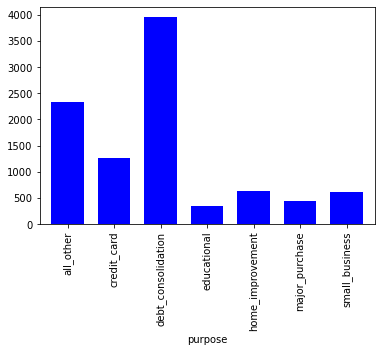

In [37]:
# Purpose of loan
purposeplot = loandata.groupby(['purpose']).size()
purposeplot.plot.bar(color = 'blue', width = 0.7)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

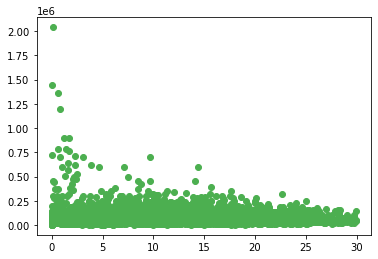

In [41]:
#Scatter plot for annual income vs debt to income ratio (dti)
y = loandata['annualincome']
x = loandata['dti']
plt.scatter(x, y, color = '#4caf50')
plt.show
#high income less debt, most income 0 to 15000

In [42]:
# write to csv
loandata.to_csv('loandata_cleaned.csv', index = True)